## Loading in Networks and Analysis Options

In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import utils
import scipy
import heapq
import math

from place_cells import PlaceCells
from trajectory_generator import TrajectoryGenerator
from model import RNN
from trainer import Trainer

# Instantiate options class
class Options():
    pass

# Model 1 Options
options1 = Options()
options1.save_dir = '/home/mira/Grid_Cell_RNN/models'    # directory to save trained models
options1.n_epochs = 100      # number of training epochs
options1.n_steps = 1000      # number of training steps (batches per epoch)
options1.batch_size = 200      # number of trajectories per batch (originally 200)
options1.sequence_length = 50  # number of steps per trajectory (originally 20)
options1.activation = 'relu'     # activation function chosen (relu or sigmoid)
options1.learning_rate = 1e-4  # gradient descent learning rate
options1.Np = 512              # number of place cells
options1.Ng = 2500             # number of grid cells
options1.place_cell_rf = 0.12  # width of place cell center tuning curve (m)
options1.surround_scale = 2    # if DoG, ratio of sigma2^2 to sigma1^2
options1.weight_decay = 1e-4   # strength of weight decay on recurrent weights
options1.DoG = True            # use difference of gaussians tuning curves
options1.periodic = False      # trajectories with periodic boundary conditions
options1.box_width = 2.2       # width of training environment
options1.box_height = 2.2      # height of training environment
options1.vel_sigma = 0       # noise in velocity stream
options1.vel_scale = 1.0     # attenuation of velocity stream
options1.hid_sigma = 0      # noise in hidden stream
options1.hid_scale = 1.0        # attenuation of hidden stream
options1.replication_num = '01' # ID to differentiate models trained on the same parameters (optional)

# Generate run ID
options1.run_ID = utils.generate_run_ID(options1)

# Put onto GPU if available
options1.device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


# Model 2 Options
options2 = Options()
options2.save_dir = options1.save_dir    # directory to save trained models
options2.n_epochs = options1.n_epochs      # number of training epochs
options2.n_steps = options1.n_steps      # number of training steps (batches per epoch)
options2.batch_size = options1.batch_size      # number of trajectories per batch (originally 200)
options2.sequence_length = options1.sequence_length  # number of steps per trajectory (originally 20)
options2.activation = options1.activation     # activation function chosen (relu or sigmoid)
options2.learning_rate = options1.learning_rate  # gradient descent learning rate
options2.Np = options1.Np              # number of place cells
options2.Ng = options1.Ng             # number of grid cells
options2.place_cell_rf = options1.place_cell_rf  # width of place cell center tuning curve (m)
options2.surround_scale = options1.surround_scale    # if DoG, ratio of sigma2^2 to sigma1^2
options2.weight_decay = options1.weight_decay   # strength of weight decay on recurrent weights
options2.DoG = options1.DoG            # use difference of gaussians tuning curves
options2.periodic = options1.periodic      # trajectories with periodic boundary conditions
options2.box_width = options1.box_width       # width of training environment
options2.box_height = options1.box_height      # height of training environment
options2.vel_sigma = options1.vel_sigma       # noise in velocity stream
options2.vel_scale = options1.vel_scale     # attenuation of velocity stream
options2.hid_sigma = options1.hid_sigma      # noise in hidden stream
options2.hid_scale = options1.hid_scale        # attenuation of hidden stream
options2.replication_num = '02' # ID to differentiate models trained on the same parameters (optional)

# Generate run ID
options2.run_ID = utils.generate_run_ID(options2)

# Put onto GPU if available
options2.device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


# Model 3 Options
options3 = Options()
options3.save_dir = options1.save_dir    # directory to save trained models
options3.n_epochs = options1.n_epochs      # number of training epochs
options3.n_steps = options1.n_steps      # number of training steps (batches per epoch)
options3.batch_size = options1.batch_size      # number of trajectories per batch (originally 200)
options3.sequence_length = options1.sequence_length  # number of steps per trajectory (originally 20)
options3.activation = options1.activation     # activation function chosen (relu or sigmoid)
options3.learning_rate = options1.learning_rate  # gradient descent learning rate
options3.Np = options1.Np              # number of place cells
options3.Ng = options1.Ng             # number of grid cells
options3.place_cell_rf = options1.place_cell_rf  # width of place cell center tuning curve (m)
options3.surround_scale = options1.surround_scale    # if DoG, ratio of sigma2^2 to sigma1^2
options3.weight_decay = options1.weight_decay   # strength of weight decay on recurrent weights
options3.DoG = options1.DoG            # use difference of gaussians tuning curves
options3.periodic = options1.periodic      # trajectories with periodic boundary conditions
options3.box_width = options1.box_width       # width of training environment
options3.box_height = options1.box_height      # height of training environment
options3.vel_sigma = options1.vel_sigma       # noise in velocity stream
options3.vel_scale = options1.vel_scale     # attenuation of velocity stream
options3.hid_sigma = options1.hid_sigma      # noise in hidden stream
options3.hid_scale = options1.hid_scale        # attenuation of hidden stream
options3.replication_num = '03' # ID to differentiate models trained on the same parameters (optional)

# Generate run ID
options3.run_ID = utils.generate_run_ID(options3)

# Put onto GPU if available
options3.device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


# Model 4 Options
options4 = Options()
options4.save_dir = options1.save_dir    # directory to save trained models
options4.n_epochs = options1.n_epochs      # number of training epochs
options4.n_steps = options1.n_steps      # number of training steps (batches per epoch)
options4.batch_size = options1.batch_size      # number of trajectories per batch (originally 200)
options4.sequence_length = options1.sequence_length  # number of steps per trajectory (originally 20)
options4.activation = options1.activation     # activation function chosen (relu or sigmoid)
options4.learning_rate = options1.learning_rate  # gradient descent learning rate
options4.Np = options1.Np              # number of place cells
options4.Ng = options1.Ng             # number of grid cells
options4.place_cell_rf = options1.place_cell_rf  # width of place cell center tuning curve (m)
options4.surround_scale = options1.surround_scale    # if DoG, ratio of sigma2^2 to sigma1^2
options4.weight_decay = options1.weight_decay   # strength of weight decay on recurrent weights
options4.DoG = options1.DoG            # use difference of gaussians tuning curves
options4.periodic = options1.periodic      # trajectories with periodic boundary conditions
options4.box_width = options1.box_width       # width of training environment
options4.box_height = options1.box_height      # height of training environment
options4.vel_sigma = options1.vel_sigma       # noise in velocity stream
options4.vel_scale = options1.vel_scale     # attenuation of velocity stream
options4.hid_sigma = options1.hid_sigma      # noise in hidden stream
options4.hid_scale = options1.hid_scale        # attenuation of hidden stream
options4.replication_num = '04' # ID to differentiate models trained on the same parameters (optional)

# Generate run ID
options4.run_ID = utils.generate_run_ID(options4)

# Put onto GPU if available
options4.device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


# Model 5 Options
options5 = Options()
options5.save_dir = options1.save_dir    # directory to save trained models
options5.n_epochs = options1.n_epochs      # number of training epochs
options5.n_steps = options1.n_steps      # number of training steps (batches per epoch)
options5.batch_size = options1.batch_size      # number of trajectories per batch (originally 200)
options5.sequence_length = options1.sequence_length  # number of steps per trajectory (originally 20)
options5.activation = options1.activation     # activation function chosen (relu or sigmoid)
options5.learning_rate = options1.learning_rate  # gradient descent learning rate
options5.Np = options1.Np              # number of place cells
options5.Ng = options1.Ng             # number of grid cells
options5.place_cell_rf = options1.place_cell_rf  # width of place cell center tuning curve (m)
options5.surround_scale = options1.surround_scale    # if DoG, ratio of sigma2^2 to sigma1^2
options5.weight_decay = options1.weight_decay   # strength of weight decay on recurrent weights
options5.DoG = options1.DoG            # use difference of gaussians tuning curves
options5.periodic = options1.periodic      # trajectories with periodic boundary conditions
options5.box_width = options1.box_width       # width of training environment
options5.box_height = options1.box_height      # height of training environment
options5.vel_sigma = options1.vel_sigma       # noise in velocity stream
options5.vel_scale = options1.vel_scale     # attenuation of velocity stream
options5.hid_sigma = options1.hid_sigma      # noise in hidden stream
options5.hid_scale = options1.hid_scale        # attenuation of hidden stream
options5.replication_num = '05' # ID to differentiate models trained on the same parameters (optional)

# Generate run ID
options5.run_ID = utils.generate_run_ID(options5)

# Put onto GPU if available
options5.device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


# Analysis Options and Hyperparameters (assuming all models have same parameters)
analysis_options = Options()

analysis_options.batch_size = 20      # number of trajectories per batch
analysis_options.sequence_length = 10000  # number of steps per trajectory
analysis_options.Np = options1.Np             # number of place cells
analysis_options.Ng = options1.Ng             # number of grid cells
analysis_options.place_cell_rf = 0.12  # width of place cell center tuning curve (m)
analysis_options.surround_scale = 2    # if DoG, ratio of sigma2^2 to sigma1^2
analysis_options.DoG = True            # use difference of gaussians tuning curves
analysis_options.periodic = options1.periodic      # trajectories with periodic boundary conditions
analysis_options.box_width = options1.box_width       # width of training environment
analysis_options.box_height = options1.box_height      # height of training environment

analysis_options.device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


# Making place cells
place_cells = PlaceCells(analysis_options)


# Adding activation noise
options1.vel_sigma = 0       # noise in velocity stream
options1.vel_scale = 1.0     # attenuation of velocity stream
options1.hid_sigma = 0      # noise in hidden stream
options1.hid_scale = 1.0        # attenuation of hidden stream

options2.vel_sigma = options1.vel_sigma       # noise in velocity stream
options2.vel_scale = options1.vel_scale     # attenuation of velocity stream
options2.hid_sigma = options1.hid_sigma      # noise in hidden stream
options2.hid_scale = options1.hid_scale        # attenuation of hidden stream

options3.vel_sigma = options1.vel_sigma       # noise in velocity stream
options3.vel_scale = options1.vel_scale     # attenuation of velocity stream
options3.hid_sigma = options1.hid_sigma      # noise in hidden stream
options3.hid_scale = options1.hid_scale        # attenuation of hidden stream

options4.vel_sigma = options1.vel_sigma       # noise in velocity stream
options4.vel_scale = options1.vel_scale     # attenuation of velocity stream
options4.hid_sigma = options1.hid_sigma      # noise in hidden stream
options4.hid_scale = options1.hid_scale        # attenuation of hidden stream

options5.vel_sigma = options1.vel_sigma       # noise in velocity stream
options5.vel_scale = options1.vel_scale     # attenuation of velocity stream
options5.hid_sigma = options1.hid_sigma      # noise in hidden stream
options5.hid_scale = options1.hid_scale        # attenuation of hidden stream


# Masking neurons
options1.neuron_lesion_prob = 0
options2.neuron_lesion_prob = options1.neuron_lesion_prob
options3.neuron_lesion_prob = options1.neuron_lesion_prob
options4.neuron_lesion_prob = options1.neuron_lesion_prob
options5.neuron_lesion_prob = options1.neuron_lesion_prob

# Loading trained networks for analysis
analysis_trajectory_generator = TrajectoryGenerator(analysis_options, place_cells)

# Model 1
net1 = RNN(options1, place_cells).to(options1.device)
net_train1 = Trainer(options1, net1, analysis_trajectory_generator)

# Model 2
net2 = RNN(options2, place_cells).to(options2.device)
net_train2 = Trainer(options2, net2, analysis_trajectory_generator)

# Model 3
net3 = RNN(options3, place_cells).to(options3.device)
net_train3 = Trainer(options3, net3, analysis_trajectory_generator)

# Model 4
net4 = RNN(options4, place_cells).to(options4.device)
net_train4 = Trainer(options4, net4, analysis_trajectory_generator)

# Model 5
net5 = RNN(options5, place_cells).to(options5.device)
net_train5 = Trainer(options5, net5, analysis_trajectory_generator)

# Put in list of models
models = [net1, net2, net3, net4, net5]


# Adding noise to weights
weight_noise = False
vel_weight_noise = 0.0
hid_weight_noise = 0.001

# Prune weights
prune_weights = False
vel_weight_mask = 0.0
hid_weight_mask = 0.01

# Masking weights
mask_weights = False
hid_weight_lesion_prob = 0.001

hid_weight_mask = torch.full_like(net1.hid_stream.weight, 1 - hid_weight_lesion_prob)
hid_weight_mask = torch.bernoulli(hid_weight_mask)


with torch.no_grad():
    if weight_noise:
        net1.vel_stream.weight += vel_weight_noise * torch.randn_like(net1.vel_stream.weight)
        net2.vel_stream.weight += vel_weight_noise * torch.randn_like(net2.vel_stream.weight)
        net3.vel_stream.weight += vel_weight_noise * torch.randn_like(net3.vel_stream.weight)
        net4.vel_stream.weight += vel_weight_noise * torch.randn_like(net4.vel_stream.weight)
        net5.vel_stream.weight += vel_weight_noise * torch.randn_like(net5.vel_stream.weight)

        net1.hid_stream.weight += hid_weight_noise * torch.randn_like(net1.hid_stream.weight)
        net2.hid_stream.weight += hid_weight_noise * torch.randn_like(net2.hid_stream.weight)
        net3.hid_stream.weight += hid_weight_noise * torch.randn_like(net3.hid_stream.weight)
        net4.hid_stream.weight += hid_weight_noise * torch.randn_like(net4.hid_stream.weight)
        net5.hid_stream.weight += hid_weight_noise * torch.randn_like(net5.hid_stream.weight)

        # Alternatuve way to add weight noise, scaled by stdev
        # weight_noise_factor = 0.2
        # weight_noise = weight_noise_factor * torch.std(net.vel_stream.weight)

    if prune_weights:
        net1.vel_stream.weight[abs(net1.vel_stream.weight) < vel_weight_mask] = 0.0
        net2.vel_stream.weight[abs(net2.vel_stream.weight) < vel_weight_mask] = 0.0
        net3.vel_stream.weight[abs(net3.vel_stream.weight) < vel_weight_mask] = 0.0
        net4.vel_stream.weight[abs(net4.vel_stream.weight) < vel_weight_mask] = 0.0
        net5.vel_stream.weight[abs(net5.vel_stream.weight) < vel_weight_mask] = 0.0

        net1.hid_stream.weight[abs(net1.hid_stream.weight) < hid_weight_mask] = 0.0
        net2.hid_stream.weight[abs(net2.hid_stream.weight) < hid_weight_mask] = 0.0
        net3.hid_stream.weight[abs(net3.hid_stream.weight) < hid_weight_mask] = 0.0
        net4.hid_stream.weight[abs(net4.hid_stream.weight) < hid_weight_mask] = 0.0
        net5.hid_stream.weight[abs(net5.hid_stream.weight) < hid_weight_mask] = 0.0

    if mask_weights:
        net1.hid_stream.weight *= hid_weight_mask
        net2.hid_stream.weight *= hid_weight_mask
        net3.hid_stream.weight *= hid_weight_mask
        net4.hid_stream.weight *= hid_weight_mask
        net5.hid_stream.weight *= hid_weight_mask

Restored trained model from /home/mira/Grid_Cell_RNN/models/steps_50_batch_200_relu_gridcell_2500_rf_012_DoG_True_periodic_False_lr_00001_weight_decay_00001_vsgm_0_vscl_10_hsgm_0_hscl_10_01/most_recent_model.pth
Restored trained model from /home/mira/Grid_Cell_RNN/models/steps_50_batch_200_relu_gridcell_2500_rf_012_DoG_True_periodic_False_lr_00001_weight_decay_00001_vsgm_0_vscl_10_hsgm_0_hscl_10_02/most_recent_model.pth
Restored trained model from /home/mira/Grid_Cell_RNN/models/steps_50_batch_200_relu_gridcell_2500_rf_012_DoG_True_periodic_False_lr_00001_weight_decay_00001_vsgm_0_vscl_10_hsgm_0_hscl_10_03/most_recent_model.pth
Restored trained model from /home/mira/Grid_Cell_RNN/models/steps_50_batch_200_relu_gridcell_2500_rf_012_DoG_True_periodic_False_lr_00001_weight_decay_00001_vsgm_0_vscl_10_hsgm_0_hscl_10_04/most_recent_model.pth
Restored trained model from /home/mira/Grid_Cell_RNN/models/steps_50_batch_200_relu_gridcell_2500_rf_012_DoG_True_periodic_False_lr_00001_weight_decay_0

## Analysis for Translational and Rotational Drift

/home/mira/Grid_Cell_RNN/utils.py:173: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return scipy.stats.pearsonr(arr1[mask], arr2[mask])[0] # Returns correlation
/home/mira/Grid_Cell_RNN/utils.py:203: RuntimeWarning: invalid value encountered in divide
  autocorr_radial = np.bincount(bin_indices, weights = flattened_corr, minlength = n_bins) / np.bincount(bin_indices, minlength = n_bins)


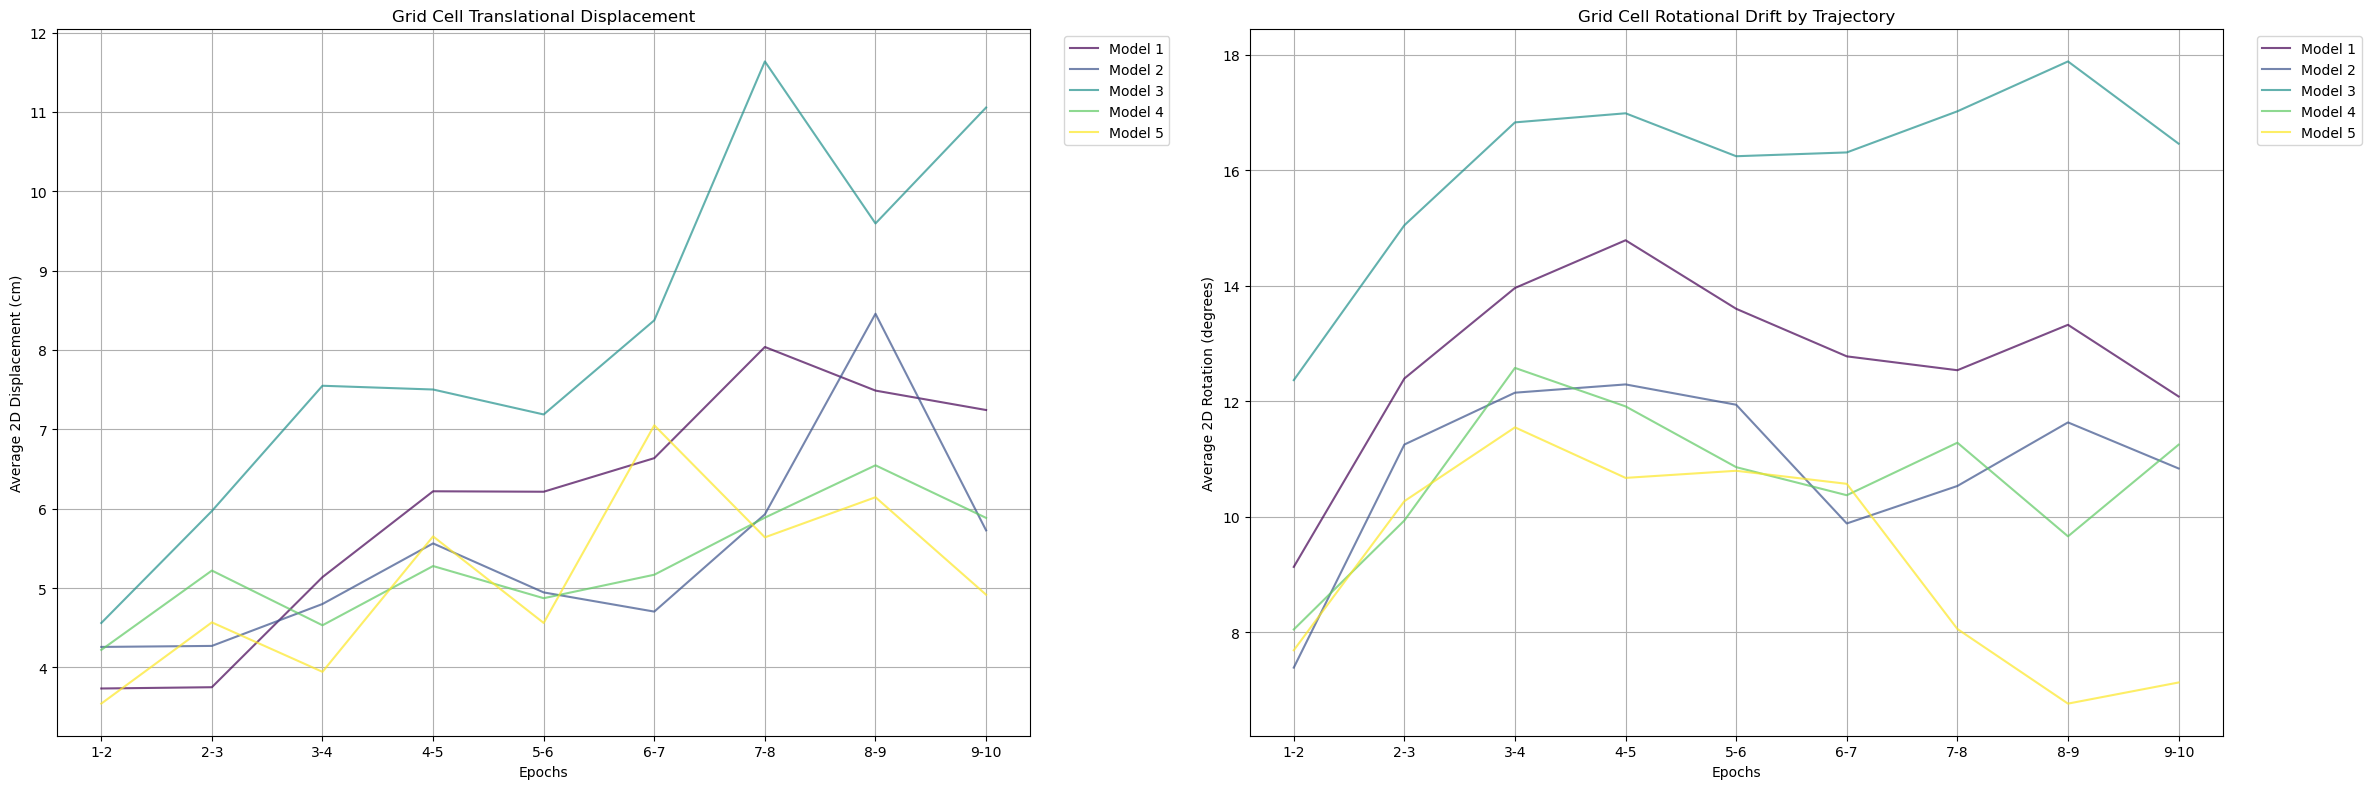

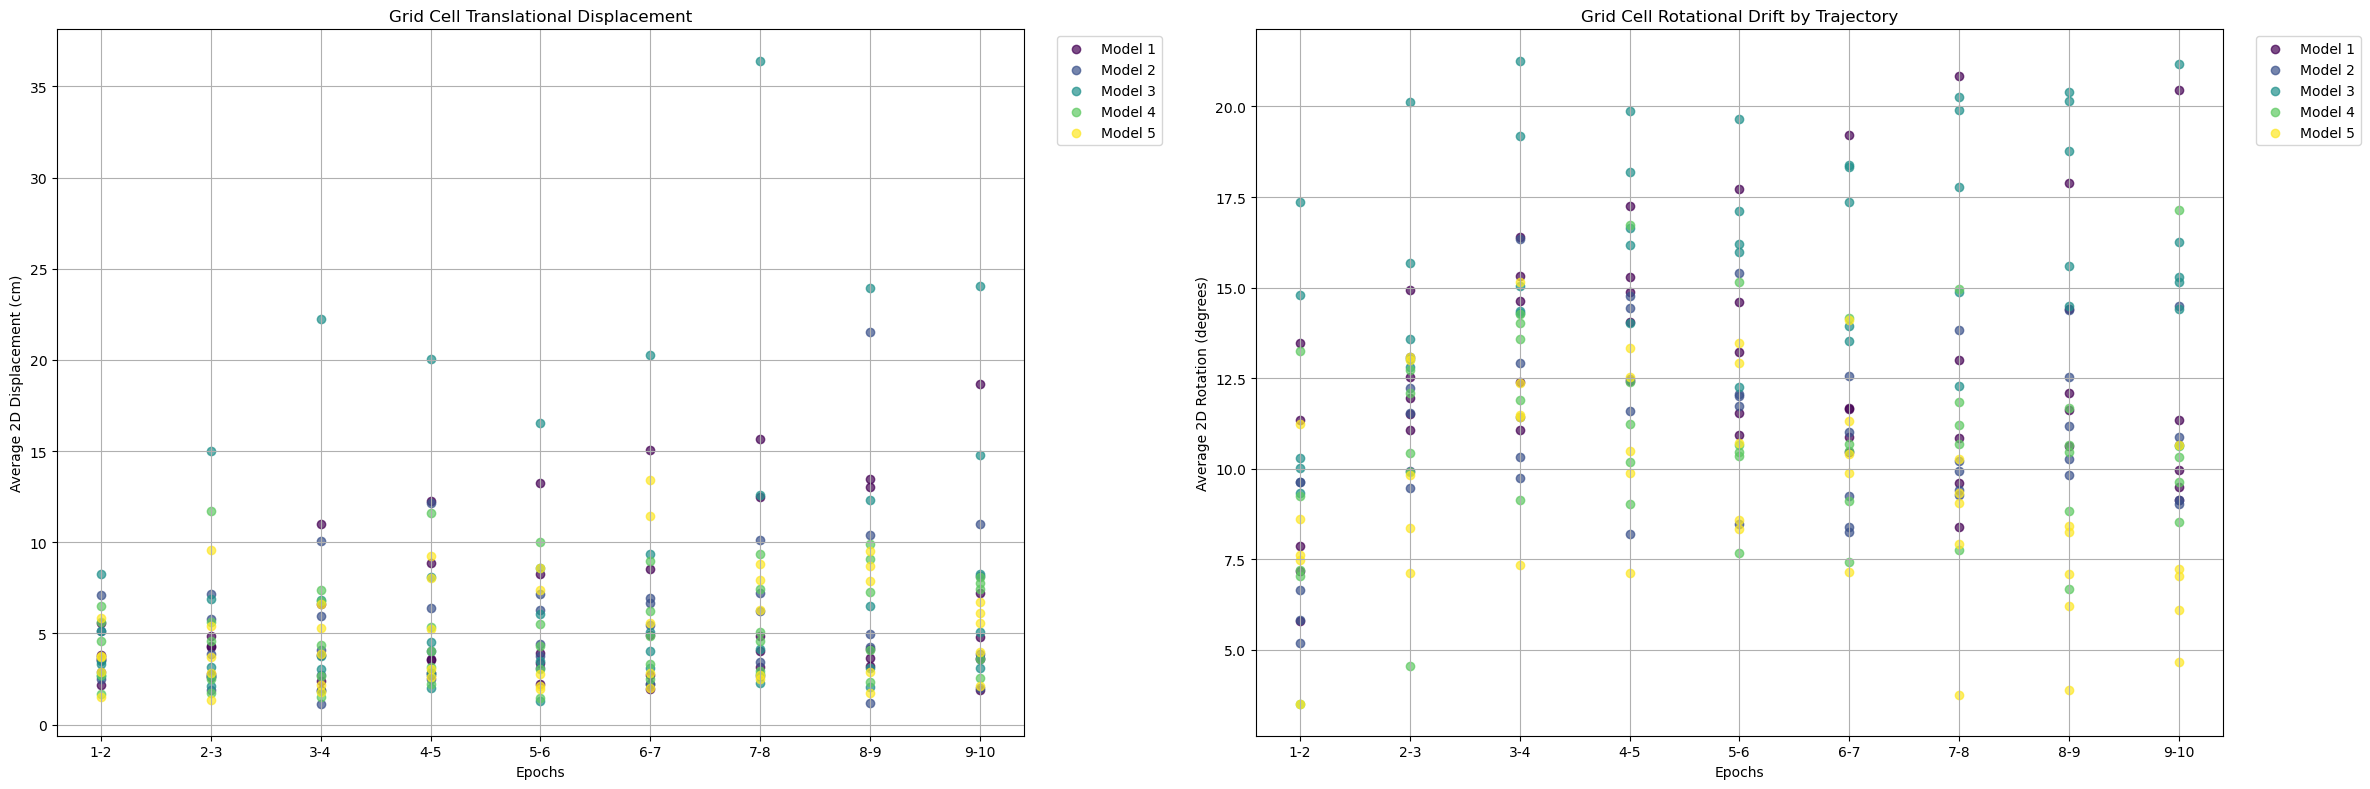

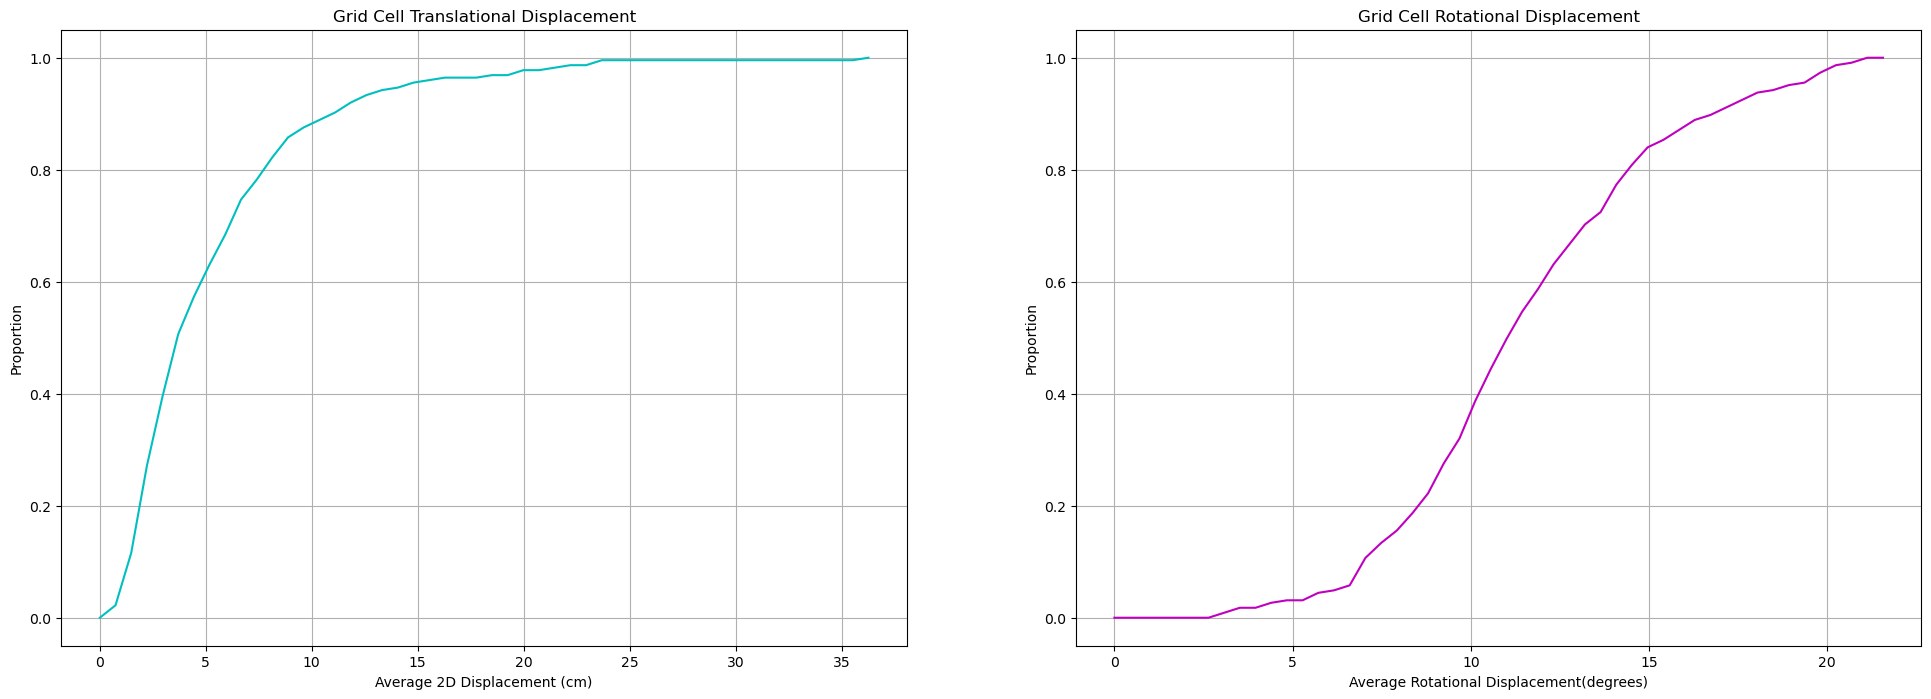

In [11]:
analysis_epochs = 10
res = 50    # Resolution
n_plots = 70 # Number of grid cells per epoch
num_traj = 5  # Number of trajectories loaded in per model

grid_activations = np.zeros([len(models), num_traj, analysis_epochs, n_plots, res, res])    # Array to save grid activations for all models and trajectories

for n, net in enumerate(models):
    idxs = np.arange(options1.Ng)

    g = np.zeros([analysis_options.sequence_length, options1.Ng])
    pos = np.zeros([analysis_options.sequence_length, 2])

    activations = np.zeros([options1.Ng, res, res])
    counts = np.zeros([res, res])

    for traj in range(num_traj):
        # Gets all relevant activations
        inputs, pos_batch, _ = analysis_trajectory_generator.get_test_batch()
        g_batch = net.grid(inputs).detach().cpu().numpy()

        pos_batch = np.reshape(pos_batch.cpu(), [-1, 2])
        g_batch = g_batch[:,:,idxs].reshape(-1, options1.Ng)

        g = g_batch
        pos = pos_batch

        x_batch = (pos_batch[:,0] + options1.box_width/2) / (options1.box_width) * res
        y_batch = (pos_batch[:,1] + options1.box_height/2) / (options1.box_height) * res

        for i in range(0, int(analysis_options.sequence_length / analysis_epochs)):
            x = x_batch[i]
            y = y_batch[i]
            if x >=0 and x < res and y >=0 and y < res:
                counts[int(x), int(y)] += 1
                activations[:, int(x), int(y)] += g_batch[i, :]

        for x in range(res):
            for y in range(res):
                if counts[x, y] > 0:
                    activations[:, x, y] /= counts[x, y]
                    
        g = g.reshape([-1, options1.Ng])
        pos = pos.reshape([-1, 2])

        rate_map = activations.reshape(options1.Ng, -1)

        # Gets array of grid scores for all grid cells
        grid_score = np.ones([options1.Ng])

        for i in range(grid_score.shape[0]):
            grid_score[i] = utils.calc_grid(activations[i])

        # Stores indices of the grid cells with the highest grid scores
        best_grid_cells = heapq.nlargest(n_plots, range(len(grid_score)), key=grid_score.__getitem__)

        # Store the best grid cell activations from epoch 1
        grid_activations[n, traj, 0] = activations[best_grid_cells]

        # Get the indices of the cells with the max grid score then track those over time
        for epoch in range(1, analysis_epochs):

            for i in range(int(analysis_options.sequence_length * (epoch)/ analysis_epochs), int(analysis_options.sequence_length * (epoch + 1) / analysis_epochs)):
                x = x_batch[i]
                y = y_batch[i]
                if x >=0 and x < res and y >=0 and y < res:
                    counts[int(x), int(y)] += 1
                    activations[:, int(x), int(y)] += g_batch[i, :]

            for x in range(res):
                for y in range(res):
                    if counts[x, y] > 0:
                        activations[:, x, y] /= counts[x, y]
                        
            g = g.reshape([-1, options1.Ng])
            pos = pos.reshape([-1, 2])

            rate_map = activations.reshape(options1.Ng, -1)

            # Store best grid cell activations
            grid_activations[n, traj, epoch] = activations[best_grid_cells]


# Translational Displacement
avg_displacements = np.zeros([len(models), num_traj, analysis_epochs - 1])
displacements = np.zeros([len(models), num_traj, analysis_epochs - 1, n_plots])
x = np.zeros([len(models), num_traj, analysis_epochs - 1])
y = np.zeros([len(models), num_traj, analysis_epochs - 1])

for i in range(len(models)):
    for j in range(num_traj):
        for epoch in range(avg_displacements.shape[2]):
            avg_displacements[i, j, epoch], displacements[i, j, epoch], x[i, j, epoch], y[i, j, epoch] = utils.translational_drift(grid_activations[i, j], n_plots, res, analysis_options.box_height,
                                                                                                                                   analysis_options.box_width, epoch, epoch + 1)

# Rotational Displacement
avg_rotations = np.zeros([len(models), num_traj, analysis_epochs - 1])

for i in range(len(models)):
    for j in range(num_traj):
        for epoch in range(avg_rotations.shape[2]):
            avg_rotations[i, j, epoch] = utils.rotational_drift(grid_activations[i, j], n_plots, epoch, epoch + 1)


# Saving data
np.save(f'/home/mira/Grid_Cell_RNN/data/1.2_velscale_tlt.npy', avg_displacements)
np.save(f'/home/mira/Grid_Cell_RNN/data/1.2_velscale_rot.npy', avg_rotations)

# Setting x-axis labels
x_axis = ['1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']

# Plotting
plt.figure(figsize=(24, 8))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Plot translational displacement
plt.subplot(121)
for i in range(len(models)):
    plt.plot(x_axis, np.mean(avg_displacements[i, :, :], axis=0), color=colors[i], alpha=0.7, label=f'Model {i+1}')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Average 2D Displacement (cm)')
plt.title('Grid Cell Translational Displacement')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()

# Plot rotational displacement
plt.subplot(122)
for i in range(len(models)):
    plt.plot(x_axis, np.mean(avg_rotations[i, :, :], axis=0), color=colors[i], alpha=0.7, label=f'Model {i+1}')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Average 2D Rotation (degrees)')
plt.title('Grid Cell Rotational Drift by Trajectory')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()

plt.savefig('/home/mira/Grid_Cell_RNN/images/plot_1.2_velscale.png')
plt.show()


# Plotting scatter
plt.figure(figsize=(24, 8))

plt.subplot(121)
for i in range(len(models)):
    for j in range(num_traj):
        plt.scatter(x_axis, avg_displacements[i, j, :], color=colors[i], alpha=0.7, label=f'Model {i+1}' if j==0 else "")

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Average 2D Displacement (cm)')
plt.title('Grid Cell Translational Displacement')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()


# Plot rotational displacement
plt.subplot(122)
for i in range(len(models)):
    for j in range(num_traj):
        plt.scatter(x_axis, avg_rotations[i, j, :], color=colors[i], alpha=0.7, label=f'Model {i+1}' if j==0 else "")

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Average 2D Rotation (degrees)')
plt.title('Grid Cell Rotational Drift by Trajectory')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()

plt.savefig('/home/mira/Grid_Cell_RNN/images/scatter_1.2_velscale.png')
plt.show()



# Plotting cumulative graph
plt.figure(figsize=(24, 8))

# Plotting translational
plt.subplot(121)
max_disp = np.ceil(np.max(avg_displacements))
num_bins = 50
bin_size = max_disp / num_bins
x = [bin_size * i for i in range(num_bins)]

cml_trans = [np.size(avg_displacements[avg_displacements < bin_size * i])/np.size(avg_displacements) for i in range(1, num_bins + 1)]
plt.plot(x, cml_trans, color='c')
plt.xlabel('Average 2D Displacement (cm)')
plt.ylabel('Proportion')
plt.title('Grid Cell Translational Displacement')
plt.grid(True)

# Plotting rotational
plt.subplot(122)
max_disp = np.ceil(np.max(avg_rotations))
num_bins = 50
bin_size = max_disp / num_bins
x = [bin_size * i for i in range(num_bins)]

cml_rot = [np.size(avg_rotations[avg_rotations < bin_size * i])/np.size(avg_rotations) for i in range(1, num_bins + 1)]
plt.plot(x, cml_rot, color='m')
plt.xlabel('Average Rotational Displacement(degrees)')
plt.ylabel('Proportion')
plt.title('Grid Cell Rotational Displacement')
plt.grid(True)

plt.savefig('/home/mira/Grid_Cell_RNN/images/cml_1.2_velscale.png')
plt.show()


## Graphing

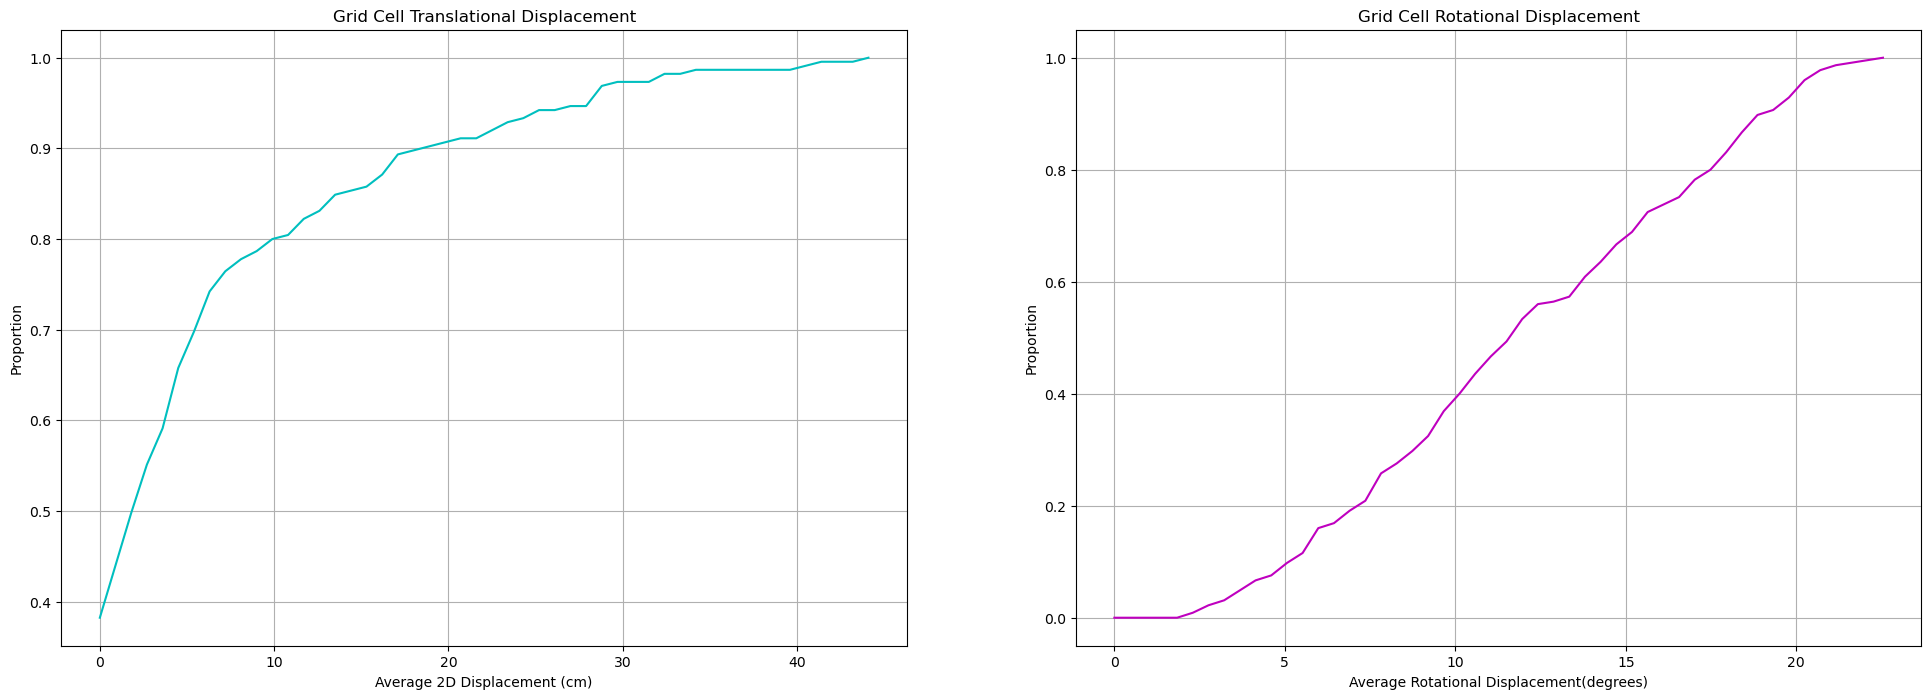

In [22]:
# Graphing:

perturb_avg_displacements = np.load('/home/mira/Grid_Cell_RNN/data/0.01_hid_mask_tlt.npy')
perturb_avg_rotations = np.load('/home/mira/Grid_Cell_RNN/data/0.01_hid_mask_rot.npy')

ctrl_avg_displacements = np.load('/home/mira/Grid_Cell_RNN/data/ctrl_tlt.npy')
ctrl_avg_rotations = np.load('/home/mira/Grid_Cell_RNN/data/ctrl_rot.npy')

# Plotting cumulative graph
plt.figure(figsize=(24, 8))

# Plotting translational
plt.subplot(121)
max_disp = np.ceil(np.max(perturb_avg_displacements))
num_bins = 50
bin_size = max_disp / num_bins
x = [bin_size * i for i in range(num_bins)]

cml_trans = [np.size(perturb_avg_displacements[perturb_avg_displacements < bin_size * i])/np.size(perturb_avg_displacements) for i in range(1, num_bins + 1)]
cml_trans_ctrl = [np.size(ctrl_avg_displacements[ctrl_avg_displacements < bin_size * i])/np.size(ctrl_avg_displacements) for i in range(1, num_bins + 1)]
plt.plot(x, cml_trans, color='c')
plt.plot(x, cml_trans_ctrl, color='p')
plt.xlabel('Average 2D Displacement (cm)')
plt.ylabel('Proportion')
plt.title('Grid Cell Translational Displacement')
plt.grid(True)

# Plotting rotational
plt.subplot(122)
max_disp = np.ceil(np.max(perturb_avg_rotations))
num_bins = 50
bin_size = max_disp / num_bins
x = [bin_size * i for i in range(num_bins)]

cml_rot = [np.size(perturb_avg_rotations[perturb_avg_rotations < bin_size * i])/np.size(perturb_avg_rotations) for i in range(1, num_bins + 1)]
cml_rot_ctrl = [np.size(ctrl_avg_rotations[ctrl_avg_rotations < bin_size * i])/np.size(ctrl_avg_rotations) for i in range(1, num_bins + 1)]
plt.plot(x, cml_rot, color='m')
plt.plot(x, cml_rot_ctrl, color='p')
plt.xlabel('Average Rotational Displacement(degrees)')
plt.ylabel('Proportion')
plt.title('Grid Cell Rotational Displacement')
plt.grid(True)

#plt.savefig('/home/mira/Grid_Cell_RNN/images/cml_0.5_velweightmask.png')
plt.show()
